In [13]:
import pandas as pd
from pca import pca
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('USArrests.csv', index_col=0)

In [7]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [11]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)

In [44]:
n = np.arange(2,25)
scores = []
wss = []
for i in n:
    km = KMeans(n_clusters=i, random_state=24)
    km.fit(df_scaled)
    scores.append([i,silhouette_score(df_scaled,km.labels_)])
    wss.append(km.inertia_)
    

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packag

In [46]:
wss

[104.96163315756871,
 80.11564032835878,
 57.66757825000804,
 50.50727764020434,
 45.758975397896755,
 41.98843719689279,
 37.73275559137711,
 36.726176165721974,
 33.19824913481648,
 32.358782771683316,
 27.63204821772997,
 26.62372587454142,
 25.926668584332866,
 21.630457548663692,
 19.633985976920737,
 18.683318220648392,
 17.435045372441945,
 16.177376380145184,
 14.324923576632553,
 12.157025213351783,
 11.228422334059047,
 10.643286337496306,
 9.899428960856326]

Text(0.5, 1.0, 'Scree Plot')

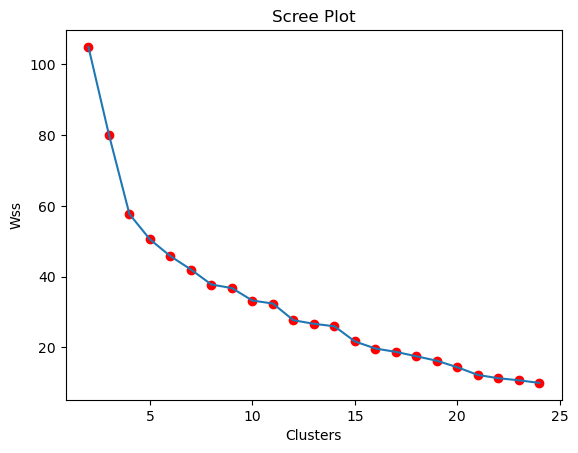

In [48]:
plt.scatter(n, wss, c='red')
plt.plot(n, wss)
plt.xlabel('Clusters')
plt.ylabel('Wss')
plt.title('Scree Plot')

### Elbow is observed at 3 hence 3 can be best number of clusters

In [51]:
scores

[[2, 0.4084890326217641],
 [3, 0.313918284155625],
 [4, 0.3387340896430468],
 [5, 0.3063274550334714],
 [6, 0.28343558948321357],
 [7, 0.24479191312248352],
 [8, 0.2486299797687173],
 [9, 0.2146914253387214],
 [10, 0.2067476952740696],
 [11, 0.18155545663053474],
 [12, 0.19873922840001984],
 [13, 0.18329935428396904],
 [14, 0.15725899265720075],
 [15, 0.17334769309263134],
 [16, 0.19364083391897502],
 [17, 0.18131265368007982],
 [18, 0.17268625569541313],
 [19, 0.1785509329955225],
 [20, 0.17484447533154182],
 [21, 0.20283240719437579],
 [22, 0.20226125000042403],
 [23, 0.19799084337523884],
 [24, 0.19207130257829028]]

#
---------------
### Iris Dataset

In [66]:
df = pd.read_csv('iris.csv')
df.drop('Species',axis = 1, inplace = True)

In [68]:
df_scl = scaler.fit_transform(df)

In [78]:
n = np.arange(2,25)
scores = []
wss = []
for  i in n:
    km = KMeans(n_clusters=i, random_state=24)
    km.fit(df_scl)
    wss.append(km.inertia_)
    scores.append([i, silhouette_score(df_scl,km.labels_)])

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packag

In [72]:
wss

[222.36170496502297,
 140.03275277428642,
 114.41256181896087,
 91.65299731413286,
 81.49314523103634,
 72.27998208468945,
 65.83318465515131,
 58.12740635965686,
 51.49380754192608,
 43.14973829819924,
 41.835349783834005,
 38.20284364850611,
 35.80166891356108,
 34.67400710640397,
 32.80065621654721,
 31.14075787312248,
 30.032834839428673,
 27.916897719972074,
 27.057462620713295,
 23.853663196922888,
 23.603925974241157,
 21.965464156225693,
 21.306327794133445]

In [80]:
scores

[[2, 0.5817500491982808],
 [3, 0.4630420362927048],
 [4, 0.41889233981710045],
 [5, 0.3557579442206815],
 [6, 0.3481279696284456],
 [7, 0.31706403846151404],
 [8, 0.346738902987719],
 [9, 0.3329769490729559],
 [10, 0.3339280392848279],
 [11, 0.3557066772661397],
 [12, 0.32885625199224533],
 [13, 0.33468369203941606],
 [14, 0.3151424321165406],
 [15, 0.2917988201128536],
 [16, 0.2748701127962771],
 [17, 0.27444108328856154],
 [18, 0.27139991706572386],
 [19, 0.27959956032736],
 [20, 0.2736877031715086],
 [21, 0.3257676790456538],
 [22, 0.3131453915484111],
 [23, 0.31551259262674336],
 [24, 0.3145889654685167]]

Text(0.5, 1.0, 'Scree Plot')

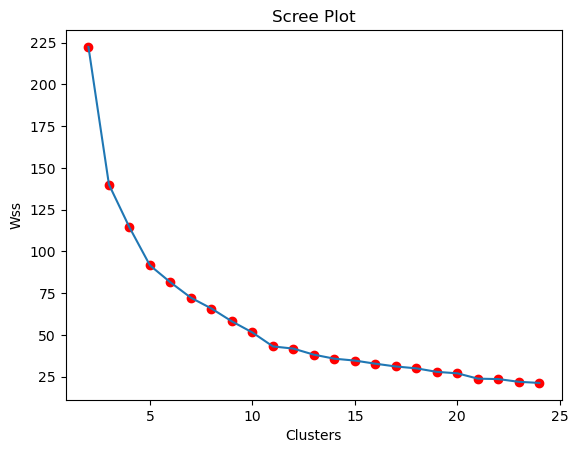

In [74]:
plt.scatter(n, wss, c='red')
plt.plot(n, wss)
plt.xlabel('Clusters')
plt.ylabel('Wss')
plt.title('Scree Plot')